In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 
import tensorflow as tf
from tensorflow.python.framework.ops import reset_default_graph

In [2]:
def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes),'uint8')
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

In [3]:
np.random.seed(0)
num_samples = 10000
X,y = sklearn.datasets.make_moons(num_samples, noise = 0.2)
num_features = X.shape[1]
num_output = np.unique(y).shape[0]

x_train = X[:6000].astype('float32')
x_valid = X[6000:8000].astype('float32')
x_test = X[8000:].astype('float32')

y_train = onehot(y[:6000].astype('int32'),num_output)
y_valid = onehot(y[6000:8000].astype('int32'),num_output)
y_test = onehot(y[8000:].astype('int32'),num_output)

In [4]:
n_nodes_hl1 = 200
n_nodes_hl2 = 200

n_classes = np.unique(y).shape[0]
batch_size = 100 # batches of features feed to network

x = tf.placeholder('float', [None, 2])
y = tf.placeholder('float')

In [5]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([num_output, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}

 	# (input_data * weights) + biases

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    output = tf.matmul(l2,output_layer['weights']) + output_layer['biases']

    return output

In [6]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    #cost = tf.reduce_mean( -tf.reduce_mean(tf.log(prediction)*y, reduction_indices=[1]) )
    # optimizer has a default parameter- learning rate = 0.01
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
    
    hm_epochs = 10 #cycles feedforward+backward
    train = []
    valid = []
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for i in range(len(x_train)//batch_size):
                idx = range(i*batch_size, (i+1)*batch_size)
                epoch_x = x_train[idx]
                epoch_y = y_train[idx]
                _, c = sess.run([optimizer, cost], feed_dict={x:epoch_x, y:epoch_y})
                epoch_loss += c
            
            train_accu = accuracy.eval({x:x_train, y:y_train})
            valid_accu = accuracy.eval({x:x_valid, y:y_valid})
            train += [train_accu]
            valid += [valid_accu]    
            print ('Epoch', epoch+1,'loss:',epoch_loss,'train_accu:',train_accu,'valid_accu:',valid_accu)
            
        plt.figure()
        plt.plot(np.arange(len(train)),train,'r',valid,'b')
        plt.legend(['train','valid'])
        test_acc = accuracy.eval({x:x_test, y:y_test})
        print('test_acc:',test_acc)

Epoch 1 loss: 1256.36817697 train_accu: 0.972167 valid_accu: 0.9695
Epoch 2 loss: 38.6354295537 train_accu: 0.971667 valid_accu: 0.9685
Epoch 3 loss: 28.5126784397 train_accu: 0.971 valid_accu: 0.967
Epoch 4 loss: 25.2796817971 train_accu: 0.971333 valid_accu: 0.967
Epoch 5 loss: 20.2416884173 train_accu: 0.971833 valid_accu: 0.969
Epoch 6 loss: 17.7643092447 train_accu: 0.973167 valid_accu: 0.9665
Epoch 7 loss: 15.5594614502 train_accu: 0.970833 valid_accu: 0.968
Epoch 8 loss: 15.1900213696 train_accu: 0.970833 valid_accu: 0.9675
Epoch 9 loss: 13.3048057919 train_accu: 0.972333 valid_accu: 0.968
Epoch 10 loss: 12.2593464367 train_accu: 0.971333 valid_accu: 0.9665
test_acc: 0.9655


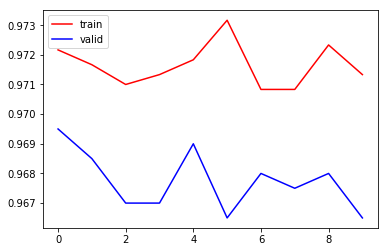

In [7]:
train_neural_network(x)